# Description

Make plots to show the computational complexity results comparing all coefficients.

# Modules loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ccc import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
COEF_COMP_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp"
COEF_COMP_DIR.mkdir(parents=True, exist_ok=True)
display(COEF_COMP_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp')

In [5]:
OUTPUT_FIGURE_DIR = COEF_COMP_DIR / "time_test"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/time_test')

In [6]:
INPUT_DIR = conf.RESULTS_DIR / "time_test"
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [7]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [8]:
time_results.shape

(15990, 4)

In [9]:
time_results.head()

,data_size,method,time,sim
0,100,p-1,0.000096,-0.014058
1,100,p-1,0.000038,-0.019761
2,100,p-1,0.000041,-0.274154
3,100,p-1,0.000034,-0.071098
4,100,p-1,0.000032,0.016989


In [10]:
time_results["method"].unique()

array(['p-1', 's-1', 'cm-1', 'mic_e-1', 'mic-1', 'p-3', 's-3', 'cm-3',
       'mic_e-3', 'mic-3', 'p-6', 's-6', 'cm-6', 'mic_e-6', 'mic-6'],
      dtype=object)

# Processing

In [11]:
time_results = time_results.replace(
    {
        "method": {
            "p-1": "Pearson (1 core)",
            "s-1": "Spearman (1 core)",
            "cm-1": "CCC (1 core)",
            "mic-1": "MIC (1 core)",
            "mic_e-1": "MICe (1 core)",
            "p-3": "Pearson (3 cores)",
            "s-3": "Spearman (3 cores)",
            "cm-3": "CCC (3 cores)",
            "mic-3": "MIC (3 cores)",
            "mic_e-3": "MICe (3 cores)",
            "p-6": "Pearson (6 cores)",
            "s-6": "Spearman (6 cores)",
            "cm-6": "CCC (6 cores)",
            "mic-6": "MIC (6 cores)",
            "mic_e-6": "MICe (6 cores)",
        }
    }
)

In [12]:
time_results.shape

(15990, 4)

In [13]:
time_results.head()

,data_size,method,time,sim
0,100,Pearson (1 core),0.000096,-0.014058
1,100,Pearson (1 core),0.000038,-0.019761
2,100,Pearson (1 core),0.000041,-0.274154
3,100,Pearson (1 core),0.000034,-0.071098
4,100,Pearson (1 core),0.000032,0.016989


# Run numbers

In [14]:
plot_data = time_results

In [15]:
run_numbers = (
    plot_data[
        plot_data["method"].str.contains("1 core", regex=False)
        | plot_data["method"].str.contains("CCC (3 cores)", regex=False)
        | plot_data["method"].str.contains("CCC (6 cores)", regex=False)
    ]
    .groupby(["data_size", "method"])["time"]
    .describe()
)
display(run_numbers)

count       mean       std        min  \
data_size method                                                      
100       CCC (1 core)       1000.0   0.000700  0.000022   0.000681   
          CCC (3 cores)      1000.0   0.001244  0.000507   0.000927   
          CCC (6 cores)      1000.0   0.002549  0.001363   0.001193   
          MIC (1 core)       1000.0   0.000723  0.000027   0.000652   
          MICe (1 core)      1000.0   0.000674  0.000022   0.000620   
          Pearson (1 core)   1000.0   0.000033  0.000005   0.000030   
          Spearman (1 core)  1000.0   0.000228  0.000011   0.000217   
500       CCC (1 core)         10.0   0.001014  0.000037   0.000985   
          CCC (3 cores)        10.0   0.001573  0.000316   0.001127   
          CCC (6 cores)        10.0   0.001548  0.000512   0.001313   
          MIC (1 core)         10.0   0.011557  0.000165   0.011262   
          MICe (1 core)        10.0   0.008868  0.000115   0.008696   
          Pearson (1 core)     10.0   0.000039  0.000014   0.000033   
          Spearman (1 core)    10.0   0.000280  0.000022   0.000266   
1000      CCC (1 core)         10.0   0.001520  0.000021   0.001473   
          CCC (3 cores)        10.0   0.001457  0.000246   0.001307   
          CCC (6 cores)        10.0   0.001665  0.000511   0.001367   
          MIC (1 core)         10.0   0.037375  0.000440   0.036806   
          MICe (1 core)        10.0   0.024938  0.000247   0.024583   
          Pearson (1 core)     10.0   0.000041  0.000013   0.000035   
          Spearman (1 core)    10.0   0.000318  0.000009   0.000310   
5000      CCC (1 core)         10.0   0.006788  0.000060   0.006672   
          CCC (3 cores)        10.0   0.003255  0.000450   0.002939   
          CCC (6 cores)        10.0   0.002966  0.000383   0.002287   
          MIC (1 core)         10.0   0.511068  0.002535   0.508058   
          MICe (1 core)        10.0   0.228089  0.000724   0.226995   
          Pearson (1 core)     10.0   0.000052  0.000013   0.000045   
          Spearman (1 core)    10.0   0.000672  0.000034   0.000647   
10000     CCC (1 core)         10.0   0.013911  0.000139   0.013680   
          CCC (3 cores)        10.0   0.006295  0.000917   0.005360   
          CCC (6 cores)        10.0   0.003929  0.000618   0.003467   
          MIC (1 core)         10.0   1.604225  0.005336   1.594926   
          MICe (1 core)        10.0   0.571711  0.001157   0.569632   
          Pearson (1 core)     10.0   0.000066  0.000015   0.000058   
          Spearman (1 core)    10.0   0.001157  0.000035   0.001128   
50000     CCC (1 core)         10.0   0.080398  0.001983   0.079082   
          CCC (3 cores)        10.0   0.028311  0.000604   0.027584   
          CCC (6 cores)        10.0   0.016299  0.001369   0.015058   
          MICe (1 core)        10.0   4.869085  0.007489   4.855632   
          Pearson (1 core)     10.0   0.000216  0.000107   0.000164   
          Spearman (1 core)    10.0   0.006197  0.000197   0.005992   
100000    CCC (1 core)         10.0   0.169880  0.004015   0.166682   
          CCC (3 cores)        10.0   0.059719  0.001602   0.057553   
          CCC (6 cores)        10.0   0.032267  0.001531   0.031124   
          Pearson (1 core)     10.0   0.000487  0.000159   0.000307   
          Spearman (1 core)    10.0   0.013500  0.000201   0.013329   
1000000   CCC (1 core)         10.0   2.374975  0.028419   2.312148   
          CCC (3 cores)        10.0   0.908605  0.005742   0.900301   
          CCC (6 cores)        10.0   0.536444  0.003756   0.531334   
          Pearson (1 core)     10.0   0.008685  0.001105   0.007643   
          Spearman (1 core)    10.0   0.175823  0.003502   0.171767   
10000000  CCC (1 core)         10.0  42.292236  0.110967  42.121878   
          CCC (3 cores)        10.0  15.907279  0.039598  15.831335   
          CCC (6 cores)        10.0   9.102648  0.049330   8.999230   
          Pearson (1 core)     10.0   0.094251  0.0007

In [16]:
# this is necessary to make sure we did not mix results when running the time test notebooks
# that could happen if the notebooks are run separately without running them all together
assert run_numbers["count"].unique().shape[0] == 2

# Plot

In [17]:
hue_order = sorted(time_results["method"].unique())

In [18]:
hue_order

['CCC (1 core)',
 'CCC (3 cores)',
 'CCC (6 cores)',
 'MIC (1 core)',
 'MIC (3 cores)',
 'MIC (6 cores)',
 'MICe (1 core)',
 'MICe (3 cores)',
 'MICe (6 cores)',
 'Pearson (1 core)',
 'Pearson (3 cores)',
 'Pearson (6 cores)',
 'Spearman (1 core)',
 'Spearman (3 cores)',
 'Spearman (6 cores)']

In [19]:
deep_colors = sns.color_palette("Paired")
display(deep_colors)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [20]:
def format_data_size(x):
    if x < 1000:
        return f"{int(x)}"
    elif x < 1000000:
        return f"{int(x/1000)}k"

    return f"{int(x/1000000)}m"


plot_data = plot_data.assign(data_size=plot_data["data_size"].apply(format_data_size))

## First analysis

Here I take a look if using more than 1 core benefits methods.

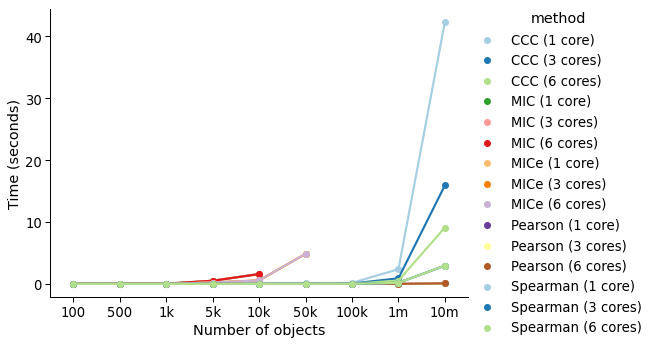

In [21]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds)")

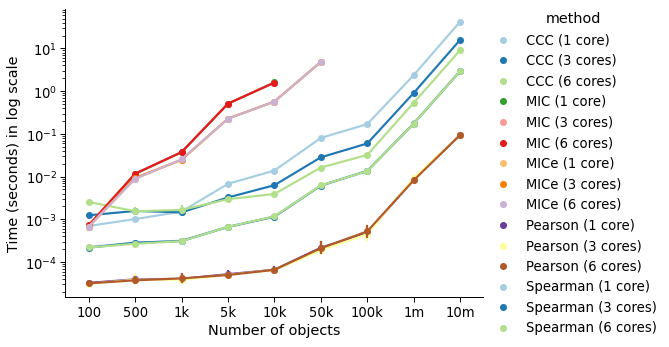

In [22]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds) in log scale")

    g.ax.set_yscale("log")

Only CCC is really taking advantage of more than 1 core, so I'll remove the rest below.

# Final analysis

In [23]:
# select runs with 3 cores for the other methods
plot_data = plot_data.replace(
    {
        "method": {
            "Pearson (6 cores)": "Pearson",
            "Spearman (6 cores)": "Spearman",
            "MIC (6 cores)": "MIC",
            "MICe (6 cores)": r"$\mathregular{MIC_e}$",
        }
    }
)

In [24]:
plot_data["method"].unique()

array(['Pearson (1 core)', 'Spearman (1 core)', 'CCC (1 core)',
       'MICe (1 core)', 'MIC (1 core)', 'Pearson (3 cores)',
       'Spearman (3 cores)', 'CCC (3 cores)', 'MICe (3 cores)',
       'MIC (3 cores)', 'Pearson', 'Spearman', 'CCC (6 cores)',
       '$\\mathregular{MIC_e}$', 'MIC'], dtype=object)

In [25]:
hue_order = [
    "MIC",
    r"$\mathregular{MIC_e}$",
    "CCC (1 core)",
    "CCC (3 cores)",
    "CCC (6 cores)",
    "Spearman",
    "Pearson",
]

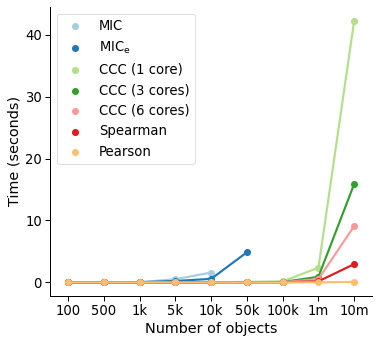

In [26]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.legend(loc="best")
    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds)")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}.svg",
        bbox_inches="tight",
        facecolor="white",
    )

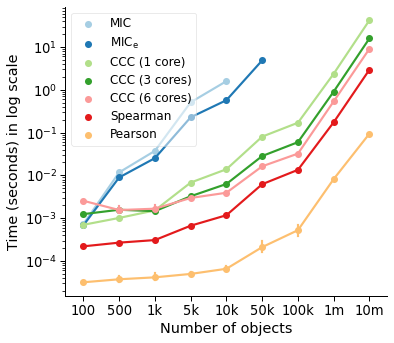

In [27]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.legend(loc="best", fontsize="small", framealpha=0.5)
    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds) in log scale")
    g.ax.set_yscale("log")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.svg",
        bbox_inches="tight",
        facecolor="white",
    )

# Create final figure

In [28]:
from svgutils.compose import Figure, SVG

In [29]:
Figure(
    "19.79335cm",
    "17.09335cm",
    # white background
    SVG(COEF_COMP_DIR / "white_background.svg").scale(0.5).move(0, 0),
    # SVG(OUTPUT_FIGURE_DIR / "time_test.svg").scale(0.05),
    SVG(OUTPUT_FIGURE_DIR / "time_test-log.svg").scale(0.05),
).save(OUTPUT_FIGURE_DIR / "time_test-main.svg")

Compile the manuscript with manubot and make sure the image has a white background and displays properly.